In [170]:
# 누락데이터 처리
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
# %load font.py
#!/usr/bin/env python

# In[ ]:


import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결



In [3]:
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [16]:
# deck 컬럼의 값들의 갯수를 세어 봄 df[''].value_counts(): 유니크한 값들의 갯수
print(df['deck'].value_counts())
print()
deck_cnt = df['deck'].value_counts(dropna=False) # NaN 데이터 포함 갯수 세기
print(deck_cnt)
print()

# isnull() 메서드로 누락된 데이터 찾기, null이면 True 반환
print(df['deck'].head().isnull())

# isnull()과 sum() 함수를 이용하여 누락된 데이터 갯수 찾기
print(df['deck'].isnull().sum())
df.isnull().sum(axis=0) # age, deck, embarked, embark_town -> null data 포함

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

0     True
1    False
2     True
3    False
4     True
Name: deck, dtype: bool
688


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
# 반복문으로 NaN 데이터 갯수 확인
nan_data = df.isnull()
for col in nan_data.columns:
    nan_cnt = nan_data[col].value_counts() # 각 열의 NaN 갯수 파악
    
    try:
        print(col,':',nan_cnt[True]) # NaN 값이 존재하면 갯수를 출력
    except:
        print(col,':',0) # NaN 값이 없으면 0을 출력
        
# NaN 데이터 확인 -> 어떻게 처리할건지?
# NaN 데이터가 있는 컬럼을 삭제?, NaN 데이터가 있는 행을 삭제?

survived : 0
pclass : 0
sex : 0
age : 177
sibsp : 0
parch : 0
fare : 0
embarked : 2
class : 0
who : 0
adult_male : 0
deck : 688
embark_town : 2
alive : 0
alone : 0


In [27]:
# df.dropna(): axis=1 열을 삭제, axis=0 행을 삭제
# dropna(): NaN이 존재하는 컬럼을 삭제, 갯수가 500 이상인 컬럼만 삭제
df_thresh = df.dropna(axis=1,thresh=500) # axis='columns'
df_thresh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [46]:
# age에 NaN이 존재하는 행을 삭제
df_age = df.dropna(subset=['age'],how='any',axis='index')
df_age.info()
print()

# 컬럼 리스트: NaN이 존재하는 컬럼 리스트
nan_col = [df.isnull().sum()>0]
print(nan_col)
print()

nan_col_names = list(df.columns[nan_col])
print(nan_col_names)
print()

# NaN이 존재하는 모든 행을 삭제
df_nan = df.dropna(subset=nan_col_names, how='any',axis='index')
print(df_nan.isnull())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB

[survived       False
pclass         False
sex            False
age           

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [59]:
# 누락 데이터 치환: df.fillna(값 또는 method=ffill / bfill,inplace=True)
print(df['age'].isnull().sum()) # NaN 존재 함
print()

# NaN이 입력된 age를 평균 나이로 치환
#print(df)
df_age = df.copy()
df_age['age'].fillna(df['age'].mean(axis=0),inplace=True)
df_age.isnull().sum()
print(df['age'].head(10),'\n\n',df_age['age'].head(10))


0

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64 

 0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64


In [70]:
# 누락 데이터 치환
# embark_town 825 ~ 831 행 출력
df.embark_town[825:832]
df['embark_town'].value_counts().idxmax()
df_em = df.copy()
df_em['embark_town'].fillna(df_em['embark_town'].value_counts().idxmax(),inplace=True)
df_em.embark_town[825:832]

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
830      Cherbourg
831    Southampton
Name: embark_town, dtype: object

In [74]:
# 누락 데이터 치환: 이전 데이터로 치환
df_me = df.copy()
df_me.embark_town.fillna(method='ffill',inplace=True)
print(df_me.embark_town[825:832],'\n\n\n', df.embark_town[825:832])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
830      Cherbourg
831    Southampton
Name: embark_town, dtype: object 


 825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
831    Southampton
Name: embark_town, dtype: object


In [87]:
# 중복 데이터 처리: df.duplicated() -> 중복 여부 확인
df1 = pd.DataFrame({'c1':['a','a','b','a','b'],'c2':[1,1,1,2,2],'c3':[1,1,2,2,2]})
print(df1)
print()

df_dup = df1.duplicated()
df_dup = df1['c1'].duplicated()
print(df_dup)
print()

# 중복된 데이터를 제거
df2 = df1.drop_duplicates()
print(df2)
print()

# 중복된 컬럼을 제거
df3 = df1.drop_duplicates(subset=['c1','c2'])
print(df3)
print()

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2

0    False
1     True
2    False
3     True
4     True
Name: c1, dtype: bool

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2



In [114]:
# titanic에서 age, fare, class, alive 컬럼만 가져와서 df_titanic으로 지정
# NaN이 있는 컬럼의 값을 숫자는 평균으로 문자는 이전 값으로 대체
# 중복된 행과 컬럼은 삭제

titanic = sns.load_dataset('titanic')
print(titanic)
print()

df_titanic = titanic.loc[:,['age','fare','class','alive']]
print(df_titanic)
print()

for col in df_titanic.columns:
    if df_titanic[col].dtype == 'float64':
        df_titanic[col].fillna(df_titanic[col].mean(),inplace=True)
    else:
        df_titanic[col].fillna(method='ffill',inplace=True)

df_titanic.head(6)
print(len(df_titanic))
print()

df_titanic.drop_duplicates(inplace=True)
print(len(df_titanic))
print()

df_titanic.drop_duplicates(subset=['age'],inplace=True)
print(len(df_titanic))
print()
    

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [127]:
# dataset/auto_mpg.csv
# 데이터 표준화
df = pd.read_csv('dataset/auto-mpg.csv',header=None)
print(df)
print()

# 컬럼 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

#df.info()
print(df.head())
print()

        0  1      2      3       4     5   6  7                          8
0    18.0  8  307.0  130.0  3504.0  12.0  70  1  chevrolet chevelle malibu
1    15.0  8  350.0  165.0  3693.0  11.5  70  1          buick skylark 320
2    18.0  8  318.0  150.0  3436.0  11.0  70  1         plymouth satellite
3    16.0  8  304.0  150.0  3433.0  12.0  70  1              amc rebel sst
4    17.0  8  302.0  140.0  3449.0  10.5  70  1                ford torino
..    ... ..    ...    ...     ...   ...  .. ..                        ...
393  27.0  4  140.0  86.00  2790.0  15.6  82  1            ford mustang gl
394  44.0  4   97.0  52.00  2130.0  24.6  82  2                  vw pickup
395  32.0  4  135.0  84.00  2295.0  11.6  82  1              dodge rampage
396  28.0  4  120.0  79.00  2625.0  18.6  82  1                ford ranger
397  31.0  4  119.0  82.00  2720.0  19.4  82  1                 chevy s-10

[398 rows x 9 columns]

    mpg  cylinders  displacement horsepower  weight  acceleration  model ye

In [132]:
# 단위 환산: mpg -> gallon => kg로 변환
mpg_to_kg = 1.60934 / 3.78541
df['kpl'] = (df['mpg']*mpg_to_kg).round(2)
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,7.652571,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,3.25
1,6.377143,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,2.71


In [148]:
import numpy as np

# 자료형 변환
df['horsepower'].unique() # '?' 발견 -> NaN으로 변경 후 NaN 처리
df['horsepower'].replace('?',np.nan,inplace=True)

# 데이터 타입을 float으로 변경
df['horsepower'] = df['horsepower'].astype('float')
#df.info()

#origin
df.origin.unique() # 숫자를 카테고리로 변경: 나라 이름으로 변경
df.origin.replace({1:'USA',2:'EU',3:'JPN'},inplace=True)
df.origin.unique()

df.origin = df.origin.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    category
 8   name          398 non-null    object  
 9   kpl           398 non-null    float64 
dtypes: category(1), float64(6), int64(2), object(1)
memory usage: 28.6+ KB


In [151]:
# 제조 년도: model year -> 카테고리로 변경
df['model year'].unique()

# 숫자를 카테고리로
df['model year'] = df['model year'].astype('category')
df.info()
df['model year'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    category
 7   origin        398 non-null    category
 8   name          398 non-null    object  
 9   kpl           398 non-null    float64 
dtypes: category(2), float64(6), int64(1), object(1)
memory usage: 26.6+ KB


[70, 71, 72, 73, 74, ..., 78, 79, 80, 81, 82]
Length: 13
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]

In [152]:
# 데이터 전처리
# 1. 누락 데이터 처리: 제거, 치환
# 2. 중복 데이터 처리: 제거(행, 컬럼), ...
# 3. 자료 표준화
#    1) 단위 환산
#    2) 자료형 변경: object -> float, object -> category
#       2.1) 변환 불가능한 자료는 NaN으로 치환하고 자료형 변경

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0      130.0  3504.0          12.0   
1    15.0          8         350.0      165.0  3693.0          11.5   
2    18.0          8         318.0      150.0  3436.0          11.0   
3    16.0          8         304.0      150.0  3433.0          12.0   
4    17.0          8         302.0      140.0  3449.0          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0      86.00  2790.0          15.6   
394  44.0          4          97.0      52.00  2130.0          24.6   
395  32.0          4         135.0      84.00  2295.0          11.6   
396  28.0          4         120.0      79.00  2625.0          18.6   
397  31.0          4         119.0      82.00  2720.0          19.4   

     model year  origin                       name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

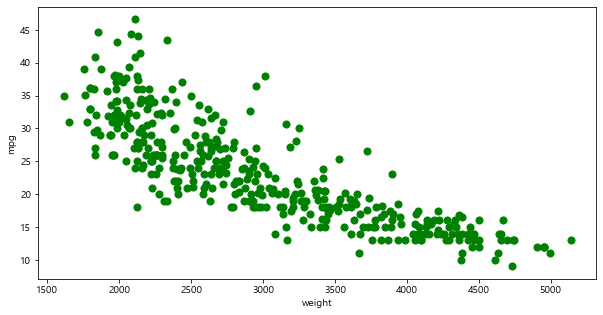

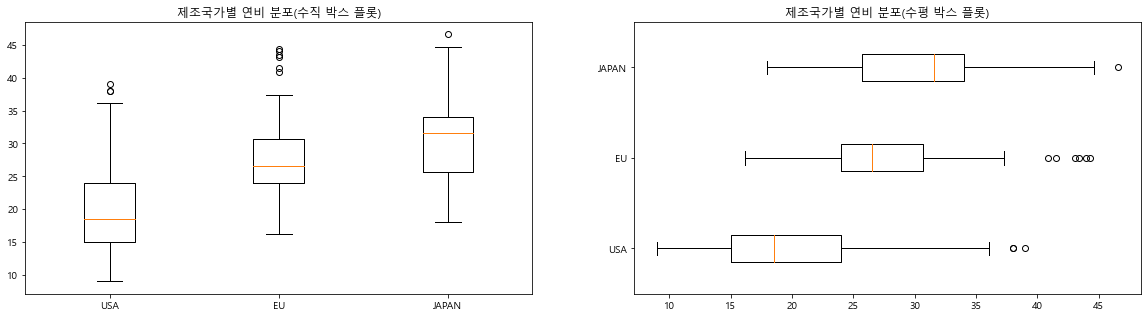

In [176]:
# 과제
# auto-mpg.csv 파일을 읽어서
df = pd.read_csv('dataset/auto-mpg.csv',header=None)
#print(df)
#print()

# 1. 컬럼명 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']
print(df)
print()

# 2. 데이터 정보 확인
#df.info()

# 3. 누락 데이터 처리 -> 삭제
df.isnull().sum()
#df['horsepower'].unique()
df['horsepower'].replace('?',np.nan,inplace=True)
#df.dropna(subset='horsepower',axis=0)


# 4. weight와 mpg의 scatter 그래프 작성
df.plot(kind='scatter',x='weight',y='mpg',figsize=(10,5),color='g',s=50)

# 5. 제조국가별로 mpg를 boxplot으로 표현
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'])

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']], 
         labels=['USA', 'EU', 'JAPAN'],
         vert=False)

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()

# 6. 중복 데이터를 제거 (행 제거)



# 7. 제조 국가 1:USA, 2:EU, 3:JPN을 컬럼의 값을 번경




